In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [ ]:
def plot_slip(region,X_grid,Y_grid,lonfosa,latfosa,Slip,filename,show=False,cmap='rainbow'):
        fig = plt.figure()
        # iniciliazar mapa
        ax=fig.add_subplot(111,projection=ccrs.PlateCarree())
        ax.set_extent(region, crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.LAND, edgecolor='black')
        ax.add_feature(cfeature.OCEAN)
        ax.add_feature(cfeature.LAKES, edgecolor='black')
        ax.add_feature(cfeature.RIVERS)
        axins = inset_axes(ax, width="45%", height="45%", loc="upper left", 
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=cartopy.crs.Orthographic(central_longitude=-70, central_latitude=-30)))
        axins.add_feature(cartopy.feature.COASTLINE)
        axins.stock_img()
        # Dibujar un rectángulo alrededor de Chile en el inset usando plot
        rect_lons = [-75, -66, -66, -75, -75]  # Longitudes para el rectángulo
        rect_lats = [-46, -46, -17, -17, -46]  # Latitudes para el rectángulo
        axins.plot(rect_lons, rect_lats, color='red', linestyle='-', linewidth=1.2,transform=ccrs.PlateCarree())
        text='Chile'
        axins.text(-75, -30, text, fontsize=10, ha='right', transform=ccrs.PlateCarree())
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
        gl.ylabels_left = False
        gl.xlabels_top = False
        ax.pcolormesh(X_grid, Y_grid, Slip, cmap=cmap,transform=ccrs.PlateCarree())
        if show==False:
            plt.savefig(filename)
            plt.close()
            return fig
        else:
            return fig

largo subfalla: 10185.174999999997 m
 ancho subfalla: 10000.0 m


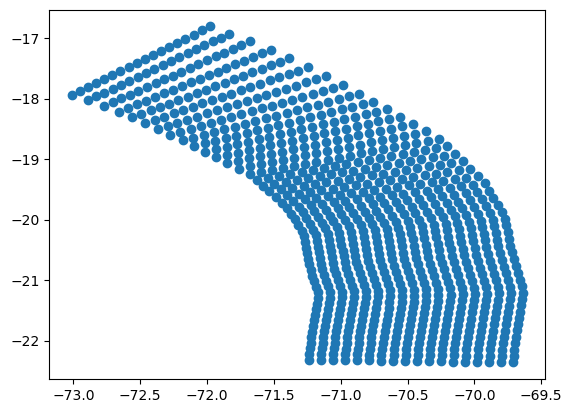

In [9]:
import geostochpy
import numpy as np
route_trench = geostochpy.get_data('trench-chile.txt')
#lonsfosa, latsfosa,strikefosa  = geostochpy.load_trench(route_trench)
slabdep,slabdip,slabstrike,slabrake=geostochpy.load_files_slab2(zone='south_america',rake=True)

lonsfosa, latsfosa,strikefosa  = np.loadtxt('/home/alex/Validation_SlipbyCoupling/base/trench_fosa.txt', unpack=True)

# remove nans of strikefosa and position to remove of lonsfosa and latsfosa position where strikefosa is nan

north=-18
width=180
length = abs(-25.8 - (-30.2)) * 111.111
nx=int(width/10)
ny=int(length/10)
Mw=9.0
dx_meters=width/nx*1000
dy_meters=length/ny*1000
print(f'largo subfalla: {dy_meters} m\n ancho subfalla: {dx_meters} m')
lon,lat,lon_flat,lat_flat=geostochpy.make_fault_alongstriketrench(lonsfosa, latsfosa,strikefosa,north, nx, ny, width, length)
X_grid,Y_grid,dep,dip,strike,rake=geostochpy.interp_slabtofault(lon_flat,lat_flat,nx,ny,slabdep,slabdip,slabstrike,slabrake)
plt.scatter(lon_flat,lat_flat)
plt.show()

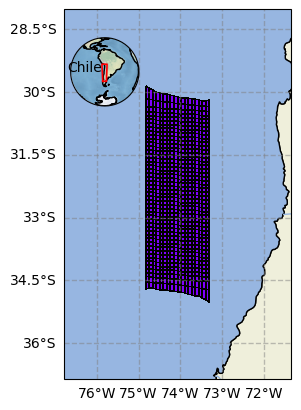

In [18]:

region=[X_grid.min()-2,X_grid.max()+2,Y_grid.min()-2,Y_grid.max()+2]
fig = plt.figure()
# iniciliazar mapa
ax=fig.add_subplot(111,projection=ccrs.PlateCarree())
ax.set_extent(region, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)
axins = inset_axes(ax, width="30%", height="30%", loc="upper left", 
            axes_class=cartopy.mpl.geoaxes.GeoAxes, 
            axes_kwargs=dict(projection=cartopy.crs.Orthographic(central_longitude=-70, central_latitude=-30)))
axins.add_feature(cartopy.feature.COASTLINE)
axins.stock_img()
# Dibujar un rectángulo alrededor de Chile en el inset usando plot
rect_lons = [-75, -66, -66, -75, -75]  # Longitudes para el rectángulo
rect_lats = [-46, -46, -17, -17, -46]  # Latitudes para el rectángulo
axins.plot(rect_lons, rect_lats, color='red', linestyle='-', linewidth=1.2,transform=ccrs.PlateCarree())
text='Chile'
axins.text(-75, -30, text, fontsize=10, ha='right', transform=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
            linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.right_labels = False
gl.top_labels = False
# ax.scatter(lon_flat,lat_flat,transform=ccrs.PlateCarree(),color='red',s=2)
ax.pcolormesh(X_grid, Y_grid, np.zeros(X_grid.shape), cmap='rainbow',transform=ccrs.PlateCarree(),edgecolors='k', linewidths=0.1)
plt.show()

In [ ]:
import numpy as np

def extraer_bordes(matriz):
    borde_superior = matriz[0, :]          # Primera fila
    borde_inferior = matriz[-1, :]         # Última fila
    borde_izquierdo = matriz[:, 0]         # Primera columna
    borde_derecho = matriz[:, -1]          # Última columna

    # Unir los bordes
    borde_completo = np.concatenate([
        borde_superior, 
        borde_derecho[1:-1], 
        borde_inferior[::-1], 
        borde_izquierdo[-2:0:-1]
    ])
    return borde_completo

# Extraer bordes para X_grid y Y_grid
borde_X = extraer_bordes(X_grid)
borde_Y = extraer_bordes(Y_grid)

plt.plot(borde_X, borde_Y)
print("Borde completo de X_grid:")
print(borde_X)

print("Borde completo de Y_grid:")
print(borde_Y)
